### Derivation of velocity and acceleration from position

In [ ]:
from sympy.physics.vector import Point, ReferenceFrame, dynamicsymbols
from sympy.physics.vector import init_vprinting

In [ ]:
N = ReferenceFrame('N')
O = Point('O')
P = Point('P')

In [ ]:
O.potential_energy

AttributeError: 'Point' object has no attribute 'potential_energy'

In [ ]:
u1, u2, u3 = dynamicsymbols('u1 u2 u3')

In [ ]:
O.set_vel(N, u1 * N.x + u2 * N.y + u3 * N.z)

In [ ]:
O.acc(N)

Derivative(u1(t), t)*N.x + Derivative(u2(t), t)*N.y + Derivative(u3(t), t)*N.z

In [ ]:
O.__dict__

{'name': 'O',
 '_pos_dict': {},
 '_vel_dict': {N: u1(t)*N.x + u2(t)*N.y + u3(t)*N.z},
 '_acc_dict': {},
 '_pdlist': [{}, {N: u1(t)*N.x + u2(t)*N.y + u3(t)*N.z}, {}]}

### X

In [ ]:
from sympy.physics.vector import ReferenceFrame, get_motion_params, dynamicsymbols
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=False)
from sympy import symbols

In [ ]:
R = ReferenceFrame('R')
v1, v2, v3 = dynamicsymbols('v1 v2 v3')

In [ ]:
v = v1*R.x + v2*R.y + v3*R.z

In [ ]:
v

a*R.x + b*R.y + c*R.z

In [ ]:
get_motion_params(R, position = v)

(v1''*R.x + v2''*R.y + v3''*R.z, v1'*R.x + v2'*R.y + v3'*R.z, v1*R.x + v2*R.y + v3*R.z)

In [ ]:
a, b, c = symbols('a b c')

In [ ]:
v = a*R.x + b*R.y + c*R.z

In [ ]:
get_motion_params(R, velocity = v)

(0, a*R.x + b*R.y + c*R.z, a*t*R.x + b*t*R.y + c*t*R.z)

In [ ]:
parameters = get_motion_params(R, acceleration = v)

In [ ]:
parameters[1]

a*t*R.x + b*t*R.y + c*t*R.z

In [ ]:
parameters[2]

a*t**2/2*R.x + b*t**2/2*R.y + c*t**2/2*R.z

In [ ]:
import sympy as sm

In [ ]:
mass = sm.symbols('m:{}'.format(2))

In [ ]:
mass[0]

m0

In [ ]:
from sympy import symbols
import sympy.physics.mechanics as me

mass, stiffness, damping, gravity = symbols('m, k, c, g')

position, speed = me.dynamicsymbols('x v')
positiond = me.dynamicsymbols('x', 1)
force = me.dynamicsymbols('F')

ceiling = me.ReferenceFrame('N')

origin = me.Point('origin')
origin.set_vel(ceiling, 0)

center = origin.locatenew('center', position * ceiling.x)
center.set_vel(ceiling, speed * ceiling.x)

block = me.Particle('block', center, mass)

kinematic_equations = [speed - positiond]

force_magnitude = mass * gravity - stiffness * position - damping * speed + force
forces = [(center, force_magnitude * ceiling.x)]

particles = [block]

kane = me.KanesMethod(ceiling, q_ind=[position], u_ind=[speed],
                      kd_eqs=kinematic_equations)
kane.kanes_equations(particles, loads=forces)

(Matrix([[-c*v(t) + g*m - k*x(t) + F(t)]]), Matrix([[-m*Derivative(v(t), t)]]))

In [ ]:
block

block

In [ ]:
from numpy import array, linspace, sin
from pydy.system import System

sys = System(kane,
             constants={mass: 1.0, stiffness: 10.0,
                        damping: 0.4, gravity: 9.8},
             specifieds={force: lambda x, t: sin(t)},
             initial_conditions={position: 0.1, speed: -1.0},
             times=linspace(0.0, 10.0, 1000))

In [ ]:
y = sys.integrate()

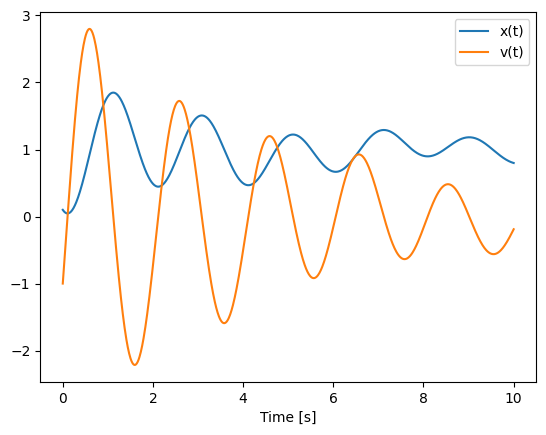

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sys.times, y)
plt.legend((str(position), str(speed)))
plt.xlabel('Time [s]')
plt.show()